# Web Scraping with Python

__author__ = "Christoph Hartleb"<br>
__copyright__ = "Copyright 2020"<br>
__credits__ = ["Christoph Hartleb"]<br>
__version__ = "1.0.2"<br>
__email__ = "christophhartleb@gmx.at"<br>
__status__ = "Production"

## Description of the project

##### That is a Script for Webscraping. The main goal of this script is to demonstrate the variety of possibilities of how to collect data with python.

### Explanation of the content:
* __1) Web Scraping with Beautiful Soup:__<br><br>The code grabs all "li" elements from the HTML, navigates to all "a" tags, extracts the text from that element, transforms it into a pandas dataframe and saves it into a "h_terms.csv" file.<br><br>
* __2) Web Scraping with lxml:__<br><br>Parse data (S&P 500) from yahoo finance and save it as a dataframe. Second example is similar, but with an XML file. It is navigated to a tag and all child elements of that tag are printed out.<br><br>
* __3) Interaction with HTML and Web APIs:__<br><br>in the last example, the code grabs data from a JSON file through an API and puts out the content.<br><br>

### 1) Web Scraping with Beautiful Soup

Data source: https://www.computer-dictionary-online.org

In [57]:
# Import requests for getting the URL and Beautifulsoup for webscraping.
import requests
from bs4 import BeautifulSoup

# Get the URL here.
r = requests.get("https://www.computer-dictionary-online.org/glossary/h.html")
# Get the content.
c = r.content

# Get the HTML element.
soup = BeautifulSoup(c,"html.parser")

In [58]:
# Find all list-elements in HTML.
all = soup.find_all("li")

In [59]:
# Create a list and iterate through all a-elements.
# Then get the text of that element and list it out
list = []
for item in all:
    list.append(str(item.find_all("a")[0].text))

In [60]:
# Import pandas and create namespace pd.
import pandas as pd

In [61]:
# Create a Pandas dataframe object.
df = pd.DataFrame(list)

In [62]:
# Creates a *.csv file in saves it within the scrapped data.
df.to_csv('h_terms.csv', index=False)

### 2) ... with lxml


2.1) Parsing HTML<br><br>
In this example it is tried to get information about the previous close, open and the olume of the S&P 500. The data source is https://finance.yahoo.com/quote/%5EGSPC?p=^GSPC. Parsing HTML should be demonstrated by that example.

2.2) Parsing XML<br><br>
Exmple number two shows how to parse XML data from <URL>

#### 2.1) Parsing HTML

Data source: https://finance.yahoo.com/quote/%5EGSPC?p=^GSPC 

In [63]:
# Import the packages.
from lxml.html import parse
from urllib.request import urlopen

In [64]:
# Parse the data.
parsed = parse(urlopen('https://finance.yahoo.com/quote/%5EGSPC?p=^GSPC'))
parsed

In [65]:
# Return the HTML element object.
doc = parsed.getroot()
doc

<Element html at 0x22307274ef8>

In [66]:
# Get the objects that display "a" elements.
links = doc.findall('.//a')
links[15:30]

[<Element a at 0x2230727a318>,
 <Element a at 0x2230727a228>,
 <Element a at 0x2230727a4f8>,
 <Element a at 0x2230727a188>,
 <Element a at 0x2230727a138>,
 <Element a at 0x22308ad5638>,
 <Element a at 0x22308ad5548>,
 <Element a at 0x22308ad55e8>,
 <Element a at 0x22308ad54a8>,
 <Element a at 0x22308ad5598>,
 <Element a at 0x22309c59728>,
 <Element a at 0x22309c59598>,
 <Element a at 0x22309c592c8>,
 <Element a at 0x22309c594a8>,
 <Element a at 0x22309c59778>]

In [67]:
# Get a link out of the list.
lnk = links[18]

In [68]:
# Give the URL back of the link.
lnk.get('href')

'/news/us-stock-market-overview-stocks-230045758.html'

In [69]:
# Finally get the content back.
lnk.text_content()

'US Stock Market Overview – Stocks Slide on Profit Taking Despite Strong Jobs Data'

In [70]:
# Now a list will be created, that show all URLs conected to that site.
urls = [lnk.get('href') for lnk in doc.findall('.//a')]
urls[-10:]

['/watchlists',
 '/portfolios',
 '/screener',
 '/premium?ncid=navbarprem_fqbo1nu0ks0',
 '/calendar',
 '/industries',
 'https://money.yahoo.com',
 '/videos/',
 '/news/',
 '/tech']

In [71]:
# Now find the calls and puts data of the site.
tables = doc.findall('.//table')
calls = tables[0]
puts = tables[-40:]

In [72]:
# Find all header lines of the elements.
rows = calls.findall('.//tr')
rows

[<Element tr at 0x22309c5dc28>,
 <Element tr at 0x22309c5dcc8>,
 <Element tr at 0x22309c5da98>]

In [73]:
# Extract the data out of the headers.
def _unpack(row, kind='td'):
    elems = row.findall('.//%s' % kind)
    return [val.text_content() for val in elems]

In [74]:
_unpack(rows[2], kind='td')

['Volume', '1,851,359,693']

In [75]:
# Combine steps to get a dataframe. To do that first of all import libraries.
from pandas.io.parsers import TextParser

In [76]:
# Define a function for convertion of types automatically.
def parse_options_data(table):
    rows = table.findall('.//tr')
    header = _unpack(rows[0], kind='th')
    data = [_unpack(r) for r in rows[0:]]
    return TextParser(data, names=header).get_chunk()

In [77]:
# Call the function to get the Output.
call_data = parse_options_data(calls)
call_data

,0,1
0,Previous Close,"3,345.78"
1,Open,"3,335.54"
2,Volume,"1,851,359,693"


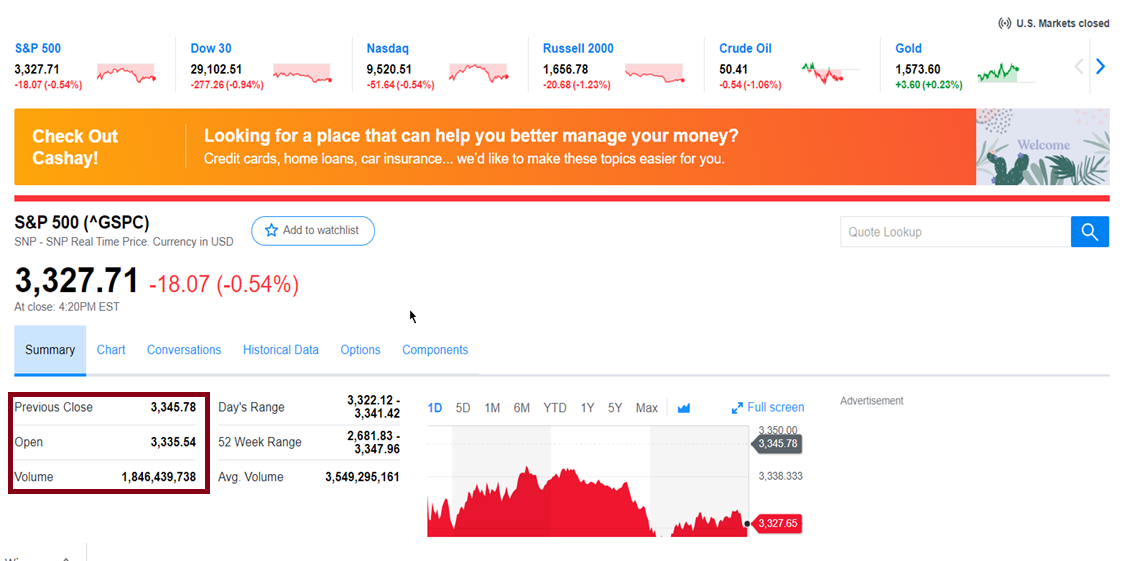

In [78]:
# Online site shown to prove that the file worked.
from IPython.display import Image
Image("online_site.png")

#### 2.2) Parsing XML

In [79]:
# Import objectify.
from lxml import objectify

In [80]:
# Set the path, ...
path = 'letterVanGogh.xml'
# ... parse the object ...
parsed = objectify.parse(open(path))
# ... and get reference to the root element. 
root = parsed.getroot()

In [81]:
# Put out the whole content of the first "listPerson" tag in the document,
# and rint out all child elements of that tag.
for elem in root.teiHeader.fileDesc.sourceDesc.listPerson.person:
    for child in elem.getchildren():
        data = []
        data.append(child.text)
        print(data)

['Vincent van Gogh']
['Theo van Gogh']
['Harry Gladwell']
['18']
['described as a "young Englishman" in the letter, obviously V. Van\n                     Gogh\'s roommate']
['Mr Tersteeg']


### 3) Interaction with HTML and Web APIs

Data source: https://samples.openweathermap.org/data/2.5/weather?q=London,uk&appid=b6907d289e10d714a6e88b30761fae22

In [82]:
import requests

In [83]:
# Assigning the API to the "url" variable.
url = 'https://samples.openweathermap.org/data/2.5/weather?q=London,uk&appid=b6907d289e10d714a6e88b30761fae22'

In [89]:
# Get the webpage
resp = requests.get(url)
# Response 200 is the expected output. It is the request for a successful HTTP request.
resp

<Response [200]>

In [90]:
# Get parsed object back.
data = resp.json()
print(data)

{'coord': {'lon': -0.13, 'lat': 51.51}, 'weather': [{'id': 300, 'main': 'Drizzle', 'description': 'light intensity drizzle', 'icon': '09d'}], 'base': 'stations', 'main': {'temp': 280.32, 'pressure': 1012, 'humidity': 81, 'temp_min': 279.15, 'temp_max': 281.15}, 'visibility': 10000, 'wind': {'speed': 4.1, 'deg': 80}, 'clouds': {'all': 90}, 'dt': 1485789600, 'sys': {'type': 1, 'id': 5091, 'message': 0.0103, 'country': 'GB', 'sunrise': 1485762037, 'sunset': 1485794875}, 'id': 2643743, 'name': 'London', 'cod': 200}
